In [1]:
from bioseq import *

### Load the substitution matrices for further use

In [2]:
blosum = read_substitution_matrix_file("bioseq/resources/blosum62.mat")
sm = substitution_matrix("ATGC_", 1, -1)

# Blast
Perform blast on the provided database and sequence

In [3]:
# initialize (will load the database with k=3)
b = Blast("bioseq/resources/seqdump.txt", 3)

In [4]:
print("Items in the db: ", len(b.db))

Items in the db:  21


In [5]:
# Load the query sequence from the "source.fasta" file
q = next(read_fasta("bioseq/resources/source.fasta"))

In [6]:
# Perform BLAST search over the previously loaded database
# By default returns top=10 with a search treshold=0.5
similar = b.search(q)

100%|█████████████████| 8879/8879 [00:20<00:00, 423.74it/s]


In [7]:
print("Sorted scores:")
for seq, score in similar:
    print(seq.name, ":", score)

Sorted scores:
XP_016791527.1 cytochrome P450 2B6 [Pan troglodytes] : 0.9901960784313726
XP_014198168.1 cytochrome P450 2B6 [Pan paniscus] : 0.9901960784313726
XP_004060827.2 PREDICTED: cytochrome P450 2B6 [Gorilla gorilla gorilla] : 0.9852941176470589
XP_002829303.1 cytochrome P450 2B6 [Pongo abelii] : 0.9742120343839542
XP_002829302.1 cytochrome P450 2B6-like [Pongo abelii] : 0.974025974025974
NP_001274566.1 cytochrome P450, family 2, subfamily B, polypeptide 6 precursor [Macaca fascicularis] : 0.9545454545454546
NP_001035302.1 cytochrome P450 2B6 precursor [Macaca mulatta] : 0.9523809523809523
XP_011762997.1 cytochrome P450 2B6 [Macaca nemestrina] : 0.9523809523809523
XP_025229771.1 cytochrome P450 2B6 [Theropithecus gelada] : 0.9523809523809523
XP_011942184.1 PREDICTED: cytochrome P450 2B6 isoform X1 [Cercocebus atys] : 0.9523809523809523


In [8]:
# get a list with all the sequences (including the query sequence) for the next step: MSA
blast_seqs = [x[0] for x in similar] + [q]

# Multiple Sequence Alignment

In [9]:
# create an MSA instance with blosum62 and a gap penalty of -1
m = MSA(blosum, -1)

In [10]:
# perform the MSA on the blast sequences
consensus, aligned_seqs = m.align(blast_seqs)

100%|██████████████████████| 10/10 [00:38<00:00,  3.70s/it]


In [11]:
print("Consensus:", consensus)

Consensus: MQGSQTRTMELSVLLFLALLTGLLLLLVQRHPNTHGRLPPGPCRPLPLLGNLLQMDRRGLLKSFHLRFREKYGDVFTVHLGPRPVVMLCGVEAIREALVDKAEAFSGRGKIAIMVDPVFQGYGVIFANGNRWKVLRRFSVTTMRDFGMGKRSVEERIQEEAQCLIEELRKSKGALMDPTFLFHSITANIICSIVFGKRFHYQDQEFLKILNLFYQTFSLASSVFGQLFELFSGFLKYFPGAHRQVYKNLQEINAYIGHSVEKHRETLDPSAPQDLIDTYLLHMEKEKSNPHSEFSHQNLNILNTLSLFFAGTETTSTTLCRYGFLLMLKYPHVAERVYKEIEQVIGPHCRPPELDDRAKMPYTEAVIHEIQRFADLLPMGVPHIVTQHTSFRGYIIPKDTEVFPLILSTALHDPHYFEKPDAFNPDHFLDANGALKKNEAFIPFSLGKRICLGEGIARAELFLFFTTILQNFSVASPVALPEDIDLTPQECGVGKIPPTYQIRFLPR


In [12]:
print("Aligned sequences:", aligned_seqs)

Aligned sequences: [MQGSQTRTMELSVLLFLALLTGLLLLLVQRHPNTHGRLPPGP_RPLPLLGNLLQMDRRGLLKSF_LRFREKYGDVFTVHLGPRPVVMLCGVEAIREALVDKAEAFSGRGKIA_MVDPFFRGYGVIFANGNRWKVLRRFSVTTMRDFGMGKRSVEERIQEEAQCLIEELRKSKGALMDPTFLFQSITANIICSIVFGKRFHYQDQEFLKMLNLFYQTFSLVSSVFGQLFELFSGFLKYFPGAHRQVYKNLQEINAYIGHSVEKHRETLDPSAPKDLIDTYLLHMEKEKSDAHSEFSHQNL_TLNTLSLFFAGTETTSTTL_RYGFLLMLKYPHVAERVYREIEQVIGPH_RPPELHDRAKMPYTEAVIYEIQRFSDLLPMGVPHIVTQHTSFRGYIIPKDTEVF_LILSTALHDPHYFEKPDAFNPDHFLDANGALKKNEAFIPFSLGKRICLGEGIARAELFLFFTTILQNFSVASPEA_PEDIDLTPQECGVGKIPPTYQIRFLPR, ________MELSVLLFLALLTGLLLLLVQRHPNTHGRLPPGP_RPLPLLGNLLQMDRRGLLKSF_LRFREKYGDVFTVHLGPRPVVMLCGVEAIREALVDKAEAFSGRGKIA_MVDPFFRGYGVIFANGNRWKVLRRFSVTTMRDFGMGKRSVEERIQEEAQCLIEELRKSKGALMDPTFLFQSITANIICSIVFGKRFHYQDQEFLKMLNLFYQTFSLVSSVFGQLFELFSGFLKYFPGAHRQVYKNLQEINAYIGHSVEKHRETLDPSAPKDLIDTYLLHMEKEKSDAHSEFSHQNL_TLNTLSLFFAGTETTSTTL_RYGFLLMLKYPHVAERVYREIEQVIGPH_RPPELHDRAKMPYTEAVIYEIQRFSDLLPMGVPHIVTQHTSFRGYIIPKDTEVF_LILSTALHDPHYFEKPDAFNPDHFLDANGALKKNEAFIPFSLGKRICLGEGIARAELFLFFTTILQN

## MSA with a simpler (easier to check visually) example

In [13]:
# Using simpler substitution matrix
ms = MSA(sm, -1)

In [14]:
seqs = [DNASeq("ATAGC"), DNASeq("AACC"), DNASeq("ATGAC")]
ms.align(seqs)

100%|███████████████████████| 2/2 [00:00<00:00, 666.77it/s]


(ATGACC, [AT_AGC, A__ACC, ATGA_C])

# Phylogenetic Trees
* Using a simple example (from the classes)
* Using the BLAST sequences (takes longer to execute ~200s)

In [15]:
# simple sm and gap penalty of -1
ps = PTree(sm, -1)

In [16]:
# first produce the distance matrix
seqs = [DNASeq("A_CATATC_AT_"), DNASeq("A_GATATT_AG_"), DNASeq("AACAGATC_T__"), DNASeq("G_CAT__CGATT")]
mxs = ps.distance_matrix(seqs)
print(mxs)

100%|███████████████████████| 6/6 [00:00<00:00, 315.61it/s]


0 3 3 5 
0 0 6 8 
0 0 0 5 
0 0 0 0 



In [17]:
# perform UPGMA clustering
c, t = ps.clustering(mxs)
print("simple clustering representation", c)

simple clustering representation (((0,2),1),3)


In [18]:
print("ASCII tree representation")
print(ps)

ASCII tree representation
                                                           __________________ 0
                              ____________________________|
  ___________________________|                            |__________________ 2
 |                           |
_|                           |____________________________ 1
 |
 |___________________________ 3




drawing the tree with Phylo:


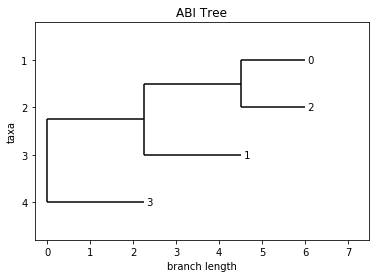

In [19]:
print("drawing the tree with Phylo:")
ps.draw()

In [20]:
# You can also check Phylo's tree text view with
print(ps.tree)

Phylogeny(name='ABI Tree', rooted=True)
    Clade()
        Clade(branch_length=2.25)
            Clade(branch_length=2.25)
                Clade(branch_length=1.5, name='0')
                Clade(branch_length=1.5, name='2')
            Clade(branch_length=2.25, name='1')
        Clade(branch_length=2.25, name='3')


### Repeat for the BLAST example
This takes longer to execute, but you can use the progress bar to keep track of time

In [21]:
# blosum and gap penalty of -1
p = PTree(blosum, -1)

In [22]:
mx = p.distance_matrix(blast_seqs)
print(mx)

100%|██████████████████████| 55/55 [03:24<00:00,  3.53s/it]


 0  8 17 19 44 51 50 50 47 49 15 
 0  0  9 11 36 43 42 42 39 41  7 
 0  0  0 14 36 43 42 42 39 41 12 
 0  0  0  0 35 42 41 41 38 40 14 
 0  0  0  0  0 47 46 46 43 46 37 
 0  0  0  0  0  0  3  5  6  9 45 
 0  0  0  0  0  0  0  2  3  6 44 
 0  0  0  0  0  0  0  0  3  6 44 
 0  0  0  0  0  0  0  0  0  3 41 
 0  0  0  0  0  0  0  0  0  0 43 
 0  0  0  0  0  0  0  0  0  0  0 



In [23]:
# This piece of code is only used to extract the contents within brackets from the species names
# so as to get more readable visualizations
from copy import deepcopy
def get_seq_with_name(x):
    y = deepcopy(x)
    n = y.name
    y.name = n[n.index("[")+1:n.index("]")]
    return y
blast_seqs_names = list(map(get_seq_with_name, blast_seqs))

In [24]:
# perform UPGMA clustering
c, t = p.clustering(mx, blast_seqs_names)
print("simple clustering representation", c)

simple clustering representation ((((((1,10),2),3),0),4),(((6,7),5),(8,9)))


In [25]:
print("ASCII tree representation")
print(p)

ASCII tree representation
                                                   __ Pan paniscus
                                              ____|
                                         ____|    |__ Homo sapiens
                                        |    |
                                  ______|    |____ Gorilla gorilla gorilla
                                 |      |
                  _______________|      |____ Pongo abelii
                 |               |
  _______________|               |______ Pan troglodytes
 |               |
 |               |_______________ Pongo abelii
 |
_|                   , Macaca mulatta
 |                  _|
 |                _| | Macaca nemestrina
 |               | |
 |_______________| |_ Macaca fascicularis
                 |
                 | , Theropithecus gelada
                 |_|
                   | Cercocebus atys




drawing the tree with Phylo:


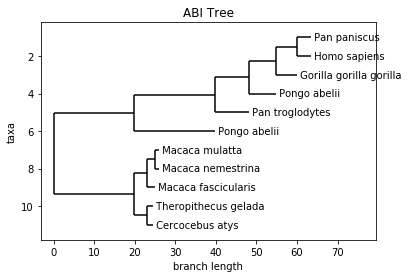

In [26]:
print("drawing the tree with Phylo:")
p.draw()

In [27]:
# You can also check Phylo's tree text view with
print(p.tree)

Phylogeny(name='ABI Tree', rooted=True)
    Clade()
        Clade(branch_length=19.906)
            Clade(branch_length=19.906)
                Clade(branch_length=8.312)
                    Clade(branch_length=6.625)
                        Clade(branch_length=5.25)
                            Clade(branch_length=3.5, name='Pan paniscus')
                            Clade(branch_length=3.5, name='Homo sapiens')
                        Clade(branch_length=5.25, name='Gorilla gorilla gorilla')
                    Clade(branch_length=6.625, name='Pongo abelii')
                Clade(branch_length=8.312, name='Pan troglodytes')
            Clade(branch_length=19.906, name='Pongo abelii')
        Clade(branch_length=19.906)
            Clade(branch_length=3.0)
                Clade(branch_length=2.0)
                    Clade(branch_length=1.0, name='Macaca mulatta')
                    Clade(branch_length=1.0, name='Macaca nemestrina')
                Clade(branch_length=2.0, name='Macaca

### Note
The indexes in the tree represent the indexes in the sequences of `blast_seqs` but they are represented with indexes for clarity, to get names of the sequences for a given index, simply do:

In [28]:
print(blast_seqs[0].name)

XP_016791527.1 cytochrome P450 2B6 [Pan troglodytes]


# Graphs
To visualize the graphs from the distance matrices, one only has to call the `graph(cut)` function for a given matrix, the `cut` parameter is a value grater than the maximum allowed distance for an edge to exist. 

In [29]:
# Using the simple example for the matrix
print(mxs)

0 3 3 5 
0 0 6 8 
0 0 0 5 
0 0 0 0 



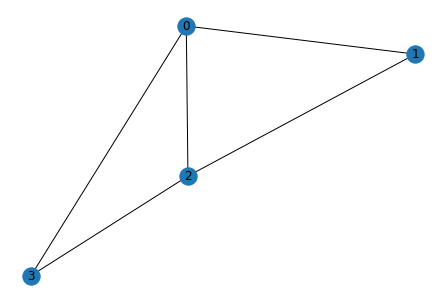

In [30]:
mxs.graph(cut=7)

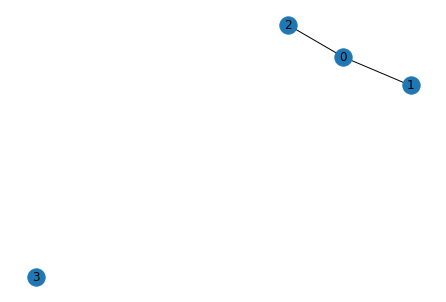

In [31]:
mxs.graph(cut=4)

In [32]:
# For the Blast sequences we have the matrix
print(mx)

 0  8 17 19 44 51 50 50 47 49 15 
 0  0  9 11 36 43 42 42 39 41  7 
 0  0  0 14 36 43 42 42 39 41 12 
 0  0  0  0 35 42 41 41 38 40 14 
 0  0  0  0  0 47 46 46 43 46 37 
 0  0  0  0  0  0  3  5  6  9 45 
 0  0  0  0  0  0  0  2  3  6 44 
 0  0  0  0  0  0  0  0  3  6 44 
 0  0  0  0  0  0  0  0  0  3 41 
 0  0  0  0  0  0  0  0  0  0 43 
 0  0  0  0  0  0  0  0  0  0  0 



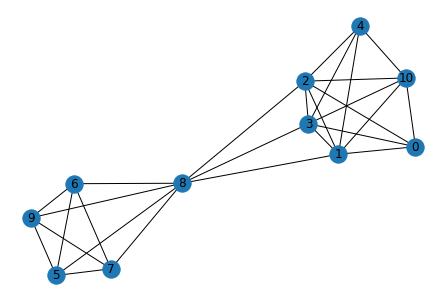

In [33]:
mx.graph(40)

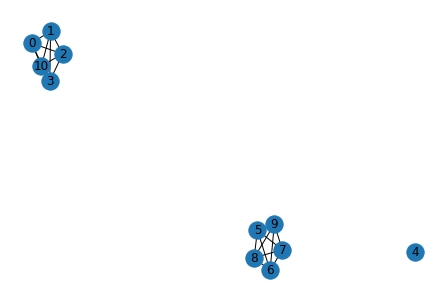

In [34]:
mx.graph(20)

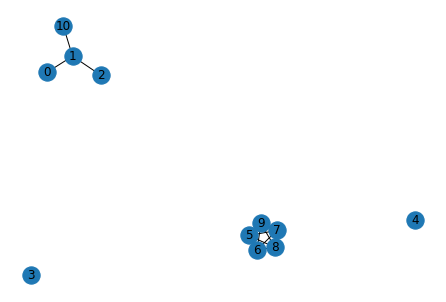

In [35]:
mx.graph(10)